In [1]:
import sys
import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def plot_lr(
    optimizer_fn,
    scheduler_fn,
    n_epochs,
    title: str,
    mode: str = "epoch"
) -> None:
    n_samples, n_features = int(1e3), int(1e1)
    X = torch.rand(n_samples, n_features)
    y = torch.randint(0, 5, size=[n_samples])

    dataset = TensorDataset(X, y)
    loader = DataLoader(dataset, batch_size=32, num_workers=0)

    model = torch.nn.Linear(n_features, 5)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optimizer_fn(model.parameters())
    scheduler = scheduler_fn(optimizer)

    lrs = []
    for ep in tqdm(range(n_epochs)):
        if mode == "epoch":
            lrs.append(optimizer.param_groups[0]["lr"])
        for batch, y in loader:
            if mode == "batch":
                lrs.append(optimizer.param_groups[0]["lr"])
            optimizer.zero_grad()
            output = model(batch)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            if mode == "batch":
                scheduler.step()
        if mode == "epoch":
            scheduler.step()
        
    plt.figure(figsize=(13, 5))
    plt.title(title)
    plt.plot(np.arange(1, len(lrs) + 1), lrs)
    plt.xlabel("epoch")
    plt.ylabel("lr")

100%|██████████| 50/50 [00:00<00:00, 64.75it/s]


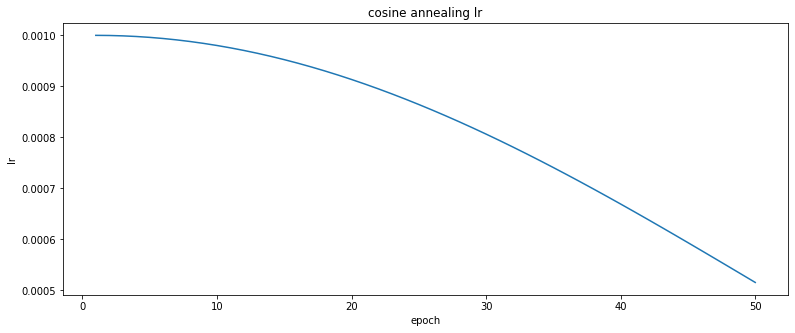

In [9]:
plot_lr(
    lambda parameters: optim.Adam(parameters, lr=1e-3),
    lambda optimizer: CosineAnnealingLR(optimizer, T_max=100, eta_min=0),
    n_epochs=50,
    title="cosine annealing lr"
)